# 梯度下降

In [2]:
import matplotlib.pyplot as plt
import numpy as np

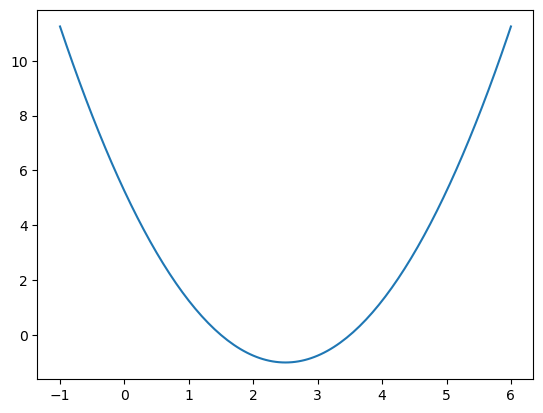

In [3]:
plot_x = np.linspace(-1,6,141)
plot_y = (plot_x-2.5)**2-1
plt.plot(plot_x,plot_y)
plt.show()

In [4]:
def derivate(theta):
    return 2*(theta-2.5)
def loss(theta):
    return (theta-2.5)**2-1

In [9]:
theta = 0
eta = 0.01
epsilon = 1e-8

In [16]:
def gradient_descent(initial_theta, eta,epsilon=1e-8):
    # 收集theta的值
    theta_hist = [initial_theta]
    theta = initial_theta
    while True:
        gradient = derivate(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_hist.append(theta)
        loss_v = loss(theta)
        
        # 中断循环条件（连续损失函数差小于一个阈值）
        if abs(loss_v - loss(last_theta)) < epsilon:
            break

    return theta_hist

In [11]:
print(theta)
print(loss(theta))

2.498462965158754
-0.9999976375238968


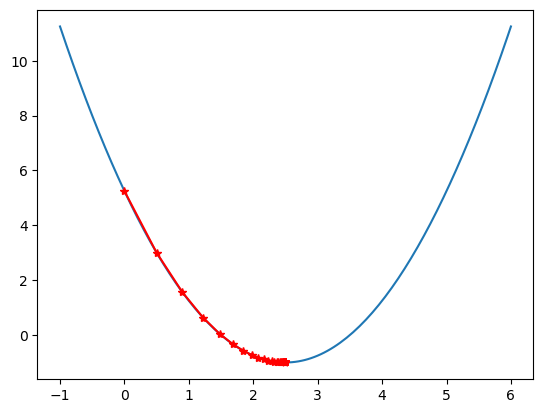

In [17]:
theta_hist = gradient_descent(0.0,0.1)
plt.plot(plot_x,plot_y)
plt.plot(theta_hist,loss(np.array(theta_hist)),color='r',marker='*')
plt.show()

In [13]:
# 训练次数
len(theta_hist) - 1

366

## 完整实现线性回归的梯度下降算法

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
BIZ UDGothic
BIZ UDGothic
BIZ UDMincho
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Californian FB
Californian FB
Californian FB
Calisto MT
Calisto MT
Calisto MT
Calisto MT
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Candara
Candara
Castellar
Centaur
Century
Century Gothic
Century Gothic
Century Gothic
Century Gothic
Century Schoolbook
Century Schoolbook
Century Schoolbook
Century Schoolbook
Chiller
Colon

In [9]:
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

真实参数：w = 3, b = 5
训练结果：w = 3.4248, b = 4.4962


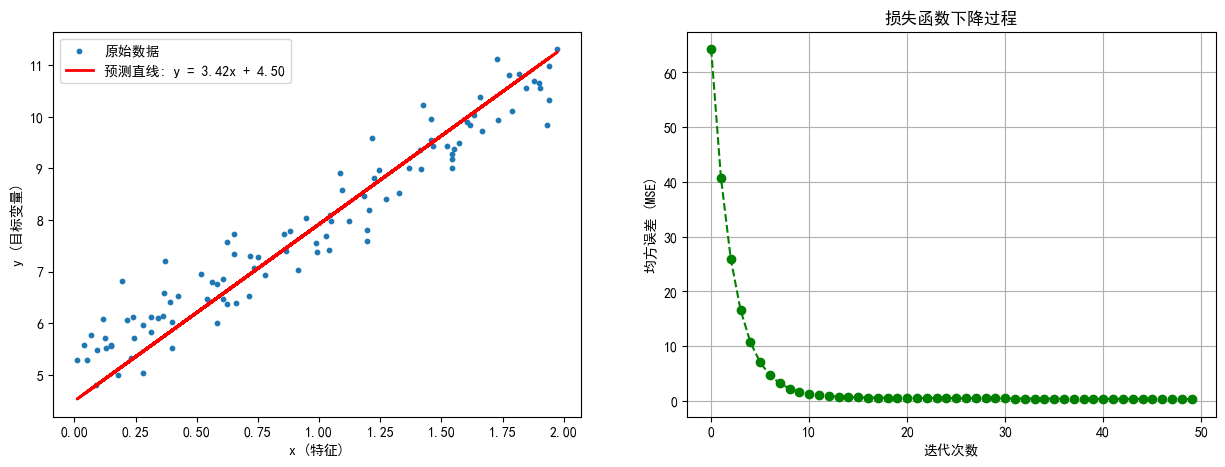

In [10]:
# 1. 生成模拟数据
np.random.seed(42)  # 固定随机种子，确保结果可复现
m = 100             # 样本数量
x = np.random.rand(m, 1) * 2  # 特征x范围 [0, 2)
true_w = 3          # 真实权重（斜率）
true_b = 5          # 真实偏置（截距）
y = true_w * x + true_b + np.random.randn(m, 1) * 0.5  # 生成y，添加高斯噪声

# 2. 初始化参数
w = 0.0   # 初始权重
b = 0.0   # 初始偏置
eta = 0.1 # 学习率
n_iters = 50  # 迭代次数

# 存储训练过程中的损失和参数历史（用于可视化）
losses = []
weights = [w]
biases = [b]

# 3. 梯度下降迭代
for epoch in range(n_iters): #既可以设置迭代次数，也可以设置损失函数之差的阈值
    # 计算预测值
    y_pred = w * x + b
    
    # 计算损失（均方误差）
    loss = np.mean((y_pred - y)**2)
    losses.append(loss)
    
    # 计算梯度
    error = y_pred - y
    grad_w = (1/m) * np.sum(x * error)  # 权重梯度
    grad_b = (1/m) * np.sum(error)      # 偏置梯度
    
    # 更新参数
    w = w - eta * grad_w
    b = b - eta * grad_b
    
    # 记录参数历史
    weights.append(w)
    biases.append(b)

# 4. 输出最终结果
print(f"真实参数：w = {true_w}, b = {true_b}")
print(f"训练结果：w = {w:.4f}, b = {b:.4f}")

# 5. 可视化
plt.figure(figsize=(15, 5))

# 预测直线与原始数据
plt.subplot(1, 2, 1)
plt.scatter(x, y, s=10, label="原始数据")
plt.plot(x, w*x + b, c='red', lw=2, label=f"预测直线: y = {w:.2f}x + {b:.2f}")
plt.xlabel("x (特征)")
plt.ylabel("y (目标变量)")
plt.legend()

# 损失函数下降过程
plt.subplot(1, 2, 2)
plt.plot(range(n_iters), losses, marker='o', linestyle='--', c='green')
plt.xlabel("迭代次数")
plt.ylabel("均方误差 (MSE)")
plt.title("损失函数下降过程")
plt.grid(True)

# plt.tight_layout()
plt.show()


# 逻辑回归模型的numpy实现

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# 生成训练数据
X,y = make_classification(n_samples=150,n_features=10)
# 局部样本训练模型（过拟合，训练数据和测试数据差异特别大，训练效果好，测试效果差）
# 新样本数据模型表现不好（泛化能力差）
# 数据拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
# 权重参数：设定初始值
theta = np.random.randn(1,10)
bias = 0
# 超参数
lr = 0.01
epochs = 3000 # 训练次数


In [ ]:

def forward(x,theta,bias):
    # 线性运算
    z = np.dot(theta,x.T) + bias
    # sigmoid
    y_hat = 1/(1+np.exp(-z))
    return y_hat

def loss(y,y_hat):
    e = 1e-8
    return -y * np.log(y_hat+e) - (1-y)*np.log(1-y_hat+e)

def calc_gradient(X,y,y_hat):
    # 计算梯度
    m = X.shape[-1]
    delta_w = np.dot(y_hat-y,X)/m
    delta_b = np.mean(y_hat-y)
    return delta_w,delta_b

for i in range(epochs):
    y_hat = forward(X_train,theta,bias)
    loss_val = np.mean(loss(y_train,y_hat))
    if i % 100 == 0:
        print('step:',i,'loss:',loss)
    dw,db = calc_gradient(X_train,y_train,y_hat)
    theta -= lr*dw
    bias -= lr*db



step: 0 loss: <function loss at 0x000001A57FCC77F0>
step: 100 loss: <function loss at 0x000001A57FCC77F0>
step: 200 loss: <function loss at 0x000001A57FCC77F0>
step: 300 loss: <function loss at 0x000001A57FCC77F0>
step: 400 loss: <function loss at 0x000001A57FCC77F0>
step: 500 loss: <function loss at 0x000001A57FCC77F0>
step: 600 loss: <function loss at 0x000001A57FCC77F0>
step: 700 loss: <function loss at 0x000001A57FCC77F0>
step: 800 loss: <function loss at 0x000001A57FCC77F0>
step: 900 loss: <function loss at 0x000001A57FCC77F0>
step: 1000 loss: <function loss at 0x000001A57FCC77F0>
step: 1100 loss: <function loss at 0x000001A57FCC77F0>
step: 1200 loss: <function loss at 0x000001A57FCC77F0>
step: 1300 loss: <function loss at 0x000001A57FCC77F0>
step: 1400 loss: <function loss at 0x000001A57FCC77F0>
step: 1500 loss: <function loss at 0x000001A57FCC77F0>
step: 1600 loss: <function loss at 0x000001A57FCC77F0>
step: 1700 loss: <function loss at 0x000001A57FCC77F0>
step: 1800 loss: <func

In [33]:
# 模型测试
idx = np.random.randint(0,len(X_test),10)
x = X_test[idx]
y = y_test[idx]
def predict(x):
    pred = forward(x,theta,bias)[0]
    return [1 if p > 0.5 else 0 for p in pred]

pred = predict(x)
print(f'预测值：{pred} 真实值：{y}' )

预测值：[1, 0, 1, 1, 0, 0, 0, 1, 1, 0] 真实值：[1 0 1 1 0 0 0 1 1 0]


In [35]:
x

array([[ 0.71272166,  0.08677044,  1.55434248,  0.68199192,  0.16161115,
         0.35509638, -2.00948742,  0.27436795, -0.02454984, -0.16435202],
       [-0.78574301, -0.84565777, -0.24527454, -1.62530158, -1.67172923,
        -1.72779403,  1.08491646, -0.02902677, -0.87931995,  1.41084662],
       [-0.44012558,  0.28746018, -0.18153195, -1.69357773,  0.57143023,
         0.53053969, -1.20872269, -0.0767955 ,  0.28210318,  0.92240596],
       [-1.44764149,  0.63648476,  0.06471115, -1.12771009,  1.28371215,
         0.84362965, -0.88994248, -0.67534519, -0.34901702, -1.14280679],
       [ 0.35978748,  0.10367151,  0.8124071 , -1.19309965,  0.26271543,
        -0.82375209,  0.95456694, -1.57699446,  1.07120384,  0.64457113],
       [-0.23860316,  0.52166749, -0.06052266, -0.94330156,  1.10499827,
        -0.25602287, -1.36311345, -1.99960757, -0.61455584, -0.71942096],
       [ 1.08827604, -0.6886027 , -0.75378347,  2.73681927, -1.35600775,
        -1.50099332, -0.57464092, -0.16723364

# 逻辑回归模型的torch实现

In [1]:
import torch
from sklearn.datasets import make_classification

In [ ]:
# 超参数
learn_rate = 1e-5
# 初始化参数
w = torch.randn(1,10,requires_grad = True)
b = torch.randn(1,requires_grad = True)

# 数据准备
X,y = make_classification(n_features = 10)

# 创建张量
tensor_x = torch.tensor(X,dtype = torch.float)
tensor_y = torch.tensor(y,dtype = torch.float)

# 训练
for i in range(5000):
    # 前向传播
    r = torch.nn.functional.linear(tensor_x,w,b)
    r = torch.sigmoid(r)
    # 计算损失
    loss = torch.nn.functional.binary_cross_entropy(r.squeeze(1),tensor_y,reduction = 'mean')
    # 反向传播，更新梯度
    loss.backward()
    with torch.autograd.no_grad():
        w -= learn_rate * w.grad
        w.grad.zero_()
        b -= learn_rate * b.grad
        b.grad.zero_()
    print(f'train losss:{loss.item():.4f}')

torch.save({
    'w': w,
    'b': b
}, 'model_parameters.pth')

train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5386
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:0.5385
train losss:

AttributeError: 'Tensor' object has no attribute 'state_dict'

In [5]:
torch.save({
    'w': w,
    'b': b
}, 'model_parameters.pth')

In [24]:
# 加载参数
checkpoint = torch.load('model_parameters.pth')
w = checkpoint['w']
b = checkpoint['b']

# 预测函数
def predict(input_data):
    with torch.no_grad():  # 禁用梯度计算
        # 转换输入为张量
        input_tensor = torch.tensor(input_data, dtype=torch.float)
        # 前向传播（与训练时保持一致）
        linear_output = torch.nn.functional.linear(input_tensor, w, b)
        prob = torch.sigmoid(linear_output)
        return prob  # 返回概率值

# 数据准备
X,y = make_classification(10,n_features = 10)

# 创建张量
tensor_x = torch.tensor(X,dtype = torch.float)
tensor_y = torch.tensor(y,dtype = torch.float)

# 预测
prediction = predict(tensor_x)
print('预测值:',[1 if prob > 0.5 else 0 for prob in prediction.numpy()],'\n'\
      ,'真实值：',[int(i) for i in tensor_y.numpy()])  # >0.5视为正类，否则负类


预测值: [1, 0, 0, 1, 1, 1, 0, 1, 1, 1] 
 真实值： [0, 0, 0, 0, 1, 1, 0, 1, 1, 1]


C:\Users\czx\AppData\Local\Temp\ipykernel_2108\813511889.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('model_parameters.pth')
C:\Users\czx\App

In [23]:
[1 if prob > 0.5 else 0 for prob in prediction.numpy()]

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1]

tensor([[0.0068],
        [0.9536],
        [0.8535],
        [0.0936],
        [0.3977],
        [0.9885],
        [0.5536],
        [0.8413],
        [0.7244],
        [0.8572]])

# 模型训练的基本步骤

1. 数据准备
2. 参数初始化
3. 向前传播（模型构建）
4. 损失函数定义
5. 反向传播（模型训练）
6. 参数更新
7. 循环迭代
8. 模型测试